# Loading the necessary libraries

In [1]:
!cat /etc/issue

Ubuntu 18.04.6 LTS \n \l



In [ ]:
!pip install opencv-python==4.1.1.26

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import the necessary libraries
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
cv2.__version__

'4.6.0'

In [ ]:
!pip list

# Loading images



In [13]:
channel = 'BGR'
channel[: : -1]

'RGB'

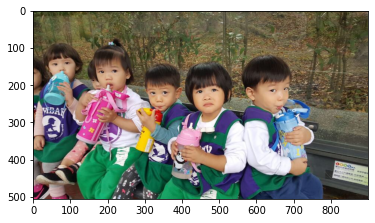

In [17]:
# CV2 讀入是 BGR --> RGB : 方式一
test_image = cv2.imread('./groups.jpg') #BGR 2 RGB 

test_image2 = test_image.copy()
test_image2[:, :, 0] = test_image[:, :, 2]
test_image2[:, :, 2] = test_image[:, :, 0]

plt.imshow(test_image2)
plt.show()

In [ ]:
data = [1, 2, 3]
data[::-1]

[3, 2, 1]

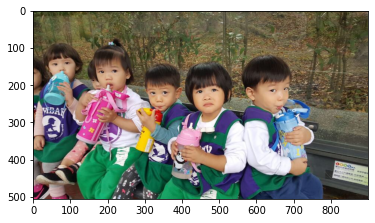

In [18]:
# CV2 讀入是 BGR --> RGB
test_image = cv2.imread('./groups.jpg') #BGR 2 RGB 
test_image2 = test_image.copy()[:, :, ::-1]  

# 第一channel : 上下
# 第一channel : 左右
# 第三channel : BGR -> RGB

plt.imshow(test_image2)
plt.show()

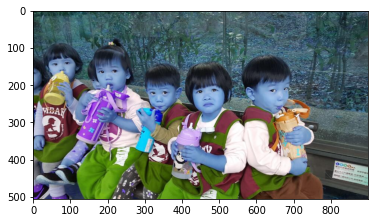

In [19]:
# CV2 讀入是 BGR --> RGB
test_image = cv2.imread('./groups.jpg')   #BGR 2 RGB  
plt.imshow(test_image)                    # 這邊是顯示 BGR 結果所以會有問題
plt.show()

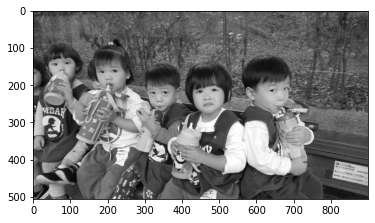

In [20]:
#  Loading the image to be tested

test_image = cv2.imread('./groups.jpg')

# Converting to grayscale as opencv expects detector takes in input gray scale images
test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Displaying grayscale image
plt.imshow(test_image_gray, cmap='gray')
plt.show()

Since we know that OpenCV loads an image in BGR format so we need to convert it into RBG format to be able to display its true colours. Let us write a small function for that.

In [21]:
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Haar cascade files

OpenCV comes with a lot of pre-trained classsifiers. For instance there are classifiers for smile, eyes,face etc. These come in the form of xml files and are located in `opencv/data/haarcascades/` folder. However, just to make things simple, you can also access them from here.Download the xml fiels and place them in data folder in the same working directory as the jupyter notebook.

### Loading the classifier for frontal face

In [ ]:
!ls --help

Usage: ls [OPTION]... [FILE]...
List information about the FILEs (the current directory by default).
Sort entries alphabetically if none of -cftuvSUX nor --sort is specified.

Mandatory arguments to long options are mandatory for short options too.
  -a, --all                  do not ignore entries starting with .
  -A, --almost-all           do not list implied . and ..
      --author               with -l, print the author of each file
  -b, --escape               print C-style escapes for nongraphic characters
      --block-size=SIZE      scale sizes by SIZE before printing them; e.g.,
                               '--block-size=M' prints sizes in units of
                               1,048,576 bytes; see SIZE format below
  -B, --ignore-backups       do not list implied entries ending with ~
  -c                         with -lt: sort by, and show, ctime (time of last
                               modification of file status information);
                               with -l:

In [22]:
print(cv2.__file__)

/usr/local/lib/python3.7/dist-packages/cv2/__init__.py


In [23]:
!ls  /usr/local/lib/python3.7/dist-packages/cv2/data/ -rtl

total 9576
drwxr-xr-x 2 root root    4096 Sep 14 13:54 __pycache__
-rw-r--r-- 1 root root      70 Sep 14 13:54 __init__.py
-rw-r--r-- 1 root root  785819 Sep 14 13:54 haarcascade_upperbody.xml
-rw-r--r-- 1 root root  188506 Sep 14 13:54 haarcascade_smile.xml
-rw-r--r-- 1 root root   75482 Sep 14 13:54 haarcascade_russian_plate_number.xml
-rw-r--r-- 1 root root  196170 Sep 14 13:54 haarcascade_righteye_2splits.xml
-rw-r--r-- 1 root root  828514 Sep 14 13:54 haarcascade_profileface.xml
-rw-r--r-- 1 root root  395322 Sep 14 13:54 haarcascade_lowerbody.xml
-rw-r--r-- 1 root root   47775 Sep 14 13:54 haarcascade_licence_plate_rus_16stages.xml
-rw-r--r-- 1 root root  195369 Sep 14 13:54 haarcascade_lefteye_2splits.xml
-rw-r--r-- 1 root root  476827 Sep 14 13:54 haarcascade_fullbody.xml
-rw-r--r-- 1 root root  930127 Sep 14 13:54 haarcascade_frontalface_default.xml
-rw-r--r-- 1 root root  676709 Sep 14 13:54 haarcascade_frontalface_alt.xml
-rw-r--r-- 1 root root 2689040 Sep 14 13:54 haarcasca

In [24]:
cv2.data.haarcascades 

'/usr/local/lib/python3.7/dist-packages/cv2/data/'

In [25]:
haar_cascade_face = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
# 路徑問題

In [26]:
!cp /usr/local/lib/python3.7/dist-packages/cv2/data/haarcascade_frontalface_default.xml .

In [ ]:
# with open('data/haarcascades/haarcascade_frontalface_default.xml') as f:
#     xml = f.read()
    
# print(xml)

# Face detection

We shall be using the detectMultiscale module of the classifier.This function will return the co-ordinates(x and y posiiton plus the height and width) of the detected faces as Rect(x,y,w,h). 

In [27]:
faces_rects = haar_cascade_face.detectMultiScale(test_image, 
                                                 scaleFactor = 1.1, 
                                                 minNeighbors = 4);

# Let us print the no. of faces found
print('Faces found: ', len(faces_rects))



        

Faces found:  5


Our next step is to loop over all the co-ordinates it returned and draw rectangles around them using Open CV.We will be drawing a green rectangle with thicknessof 2

In [ ]:
cv2.rectangle?

In [34]:
# 打入方框
for (x,y,w,h) in faces_rects:
     cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 0, 255) , 3)
                # img        #  pt1    # pt2       # color BGR     #thickness

Finally, we shall display the original image in coloured to see if the face has been detected correctly or not.

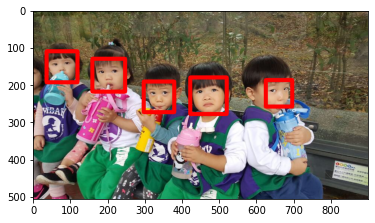

In [35]:
#convert image to RGB and show image
plt.imshow(convertToRGB(test_image))
plt.show()

### Let us create a generalised function for the entire face detection process.

In [36]:
def detect_faces(cascade, test_image, scaleFactor = 1.1, Neighbors=4, line=2):
    # create a copy of the image to prevent any changes to the original one.
    image_copy = test_image.copy()
    
    #convert the test image to gray scale as opencv face detector expects gray images
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
    
    # Applying the haar classifier to detect faces
    faces_rect = cascade.detectMultiScale(gray_image, 
                                          scaleFactor=scaleFactor, 
                                          minNeighbors=Neighbors)
    
    for (x, y, w, h) in faces_rect:
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0, 0, 255), line)
        
    return image_copy

### Testing the function on new image




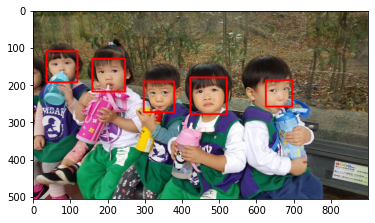

In [37]:
#loading image
test_image2 = cv2.imread('groups.jpg')

#call the function to detect faces
faces = detect_faces(haar_cascade_face, test_image2, scaleFactor = 1.1, 
                     Neighbors=4, line=3)
                    #HyperParameter
#convert to RGB and display image
plt.figure(figsize=(6,6))
plt.imshow(convertToRGB(faces))
plt.show()

### Testing the function on a group photograph

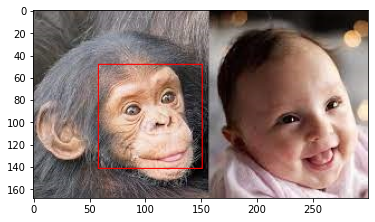

In [51]:
#loading image
test_image2 = cv2.imread('sample_2.jpg')

#call the function to detect faces
faces = detect_faces(haar_cascade_face, test_image2, scaleFactor = 1.1, 
                     Neighbors=2, line=1)

#convert to RGB and display image
plt.imshow(convertToRGB(faces))
plt.show()

### Saving the Image

In [ ]:
#  cv2.imwrite('image1.png',faces)

True

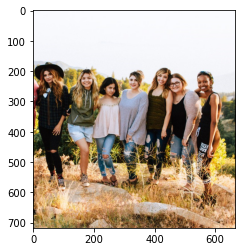

In [40]:
import ast
with open('friends_image.txt') as f:
    friends_image = np.array(ast.literal_eval(f.read()), dtype='uint8')
friends_image.shape  
plt.imshow(friends_image)
plt.show()

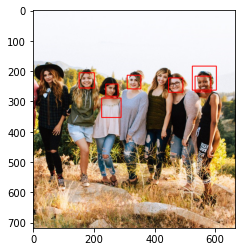

In [47]:
#loading image
test_image2 = friends_image[:, :, ::-1] # cv2.imread('baby_dog_2.jpeg')
# RGB --> BGR
#call the function to detect faces
faces = detect_faces(haar_cascade_face, test_image2, scaleFactor = 1.25, 
                     Neighbors=2, line=2)

#convert to RGB and display image
plt.imshow(convertToRGB(faces))
plt.show()